# Regresia logistică binară
<b>Subcapitolul 3.2 din suportul de curs</b>

In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import functools
import pandas as pd
from typing import Union, List

plt.rc('font', **{'size' : 18})

## Privire de ansamblu
Regresia logistică este folosită pentru estimare de probabilitate condiționată și clasificare. Inițial dezvoltată pentru recunoașterea a două clase, a fost extinsă pentru a discrimina între oricâte categorii.

Exemple de probleme care pot fi rezolvate utilizând regresia logistică binară:
- clasificarea unui mail drept spam sau legitim, dându-se atribute ale mail-ului: conținutul lui, subiectul, etc.
- clasificarea unei imagini: apare sau nu un câine în imagine, imaginea conține un câine sau o pisică (presupunând că în fiecare imagine există exact unul din aceste două animale)

Numărul de clase este cunoscut a priori. În contextul regresiei logistice binare, cele două clase despre care vorbim sunt convinabil date ca fiind <b>„1” - clasa pozitivă</b> și <b>„0” - clasa negativă</b>.

## Setul de instruire
Setul de instruire este de forma:

$$\mathcal{S}=\Set{(x^{(i)}, y^{(i)})|1 \leq i \leq m}$$

unse vectorul $x^{(i)}=(x_0^{(i)},x_1^{(i)},\dots,x_n^{(i)})^t \in \mathbb{R}^{n+1}$ si $y^{(i)} \in \Set{0,1}$

În cele ce urmează vom utiliza setul de date <i>Mnist</i>, care conține imagini cu cifre scrise de mână. Vom selecta două clase, de exemplu cifrele 4 și 8.

![Exemplu set MNIST](./mnist.png "Exemplu set MNIST").

In [18]:
path_train = './data/mnist_train.csv'
path_test = './data/mnist_test.csv'

train_set = pd.read_csv(path_train)
test_set = pd.read_csv(path_test)

assert train_set.shape == (60000, 785)
assert test_set.shape == (10000, 785)
# matrice cu 10.000 linii, pe fiecare linie "insirata" o imagine de 28x28 = 784, prima coloana a liniei in [0,9] - cifra din img

AssertionError: 

In [16]:
# train_set si test_set sunt matrice care contin pe prima coloana clasa, 
# ca o cifra de la 0 la 9
# imaginea cifrei este pastrata incepand de pe coloana 1 pana la terminare
# Decupati in train_x doar imaginile iar in train_y doar clasa,
# si faceti acelasi lucru si pentru test_x si test_y

train_x, train_y = train_set.iloc[:, 1:].values, train_set.iloc[:, 0].values
test_x, test_y = test_set.iloc[:, 1:].values, test_set.iloc[:, 0].values

assert train_x.shape == (60000, 784)
assert train_y.shape == (60000,)
assert test_x.shape == (10000, 784)
assert test_y.shape == (10000,)

AssertionError: 

Vizualizăm setul de date. Vom observa primele 16 linii din setul de antrenare

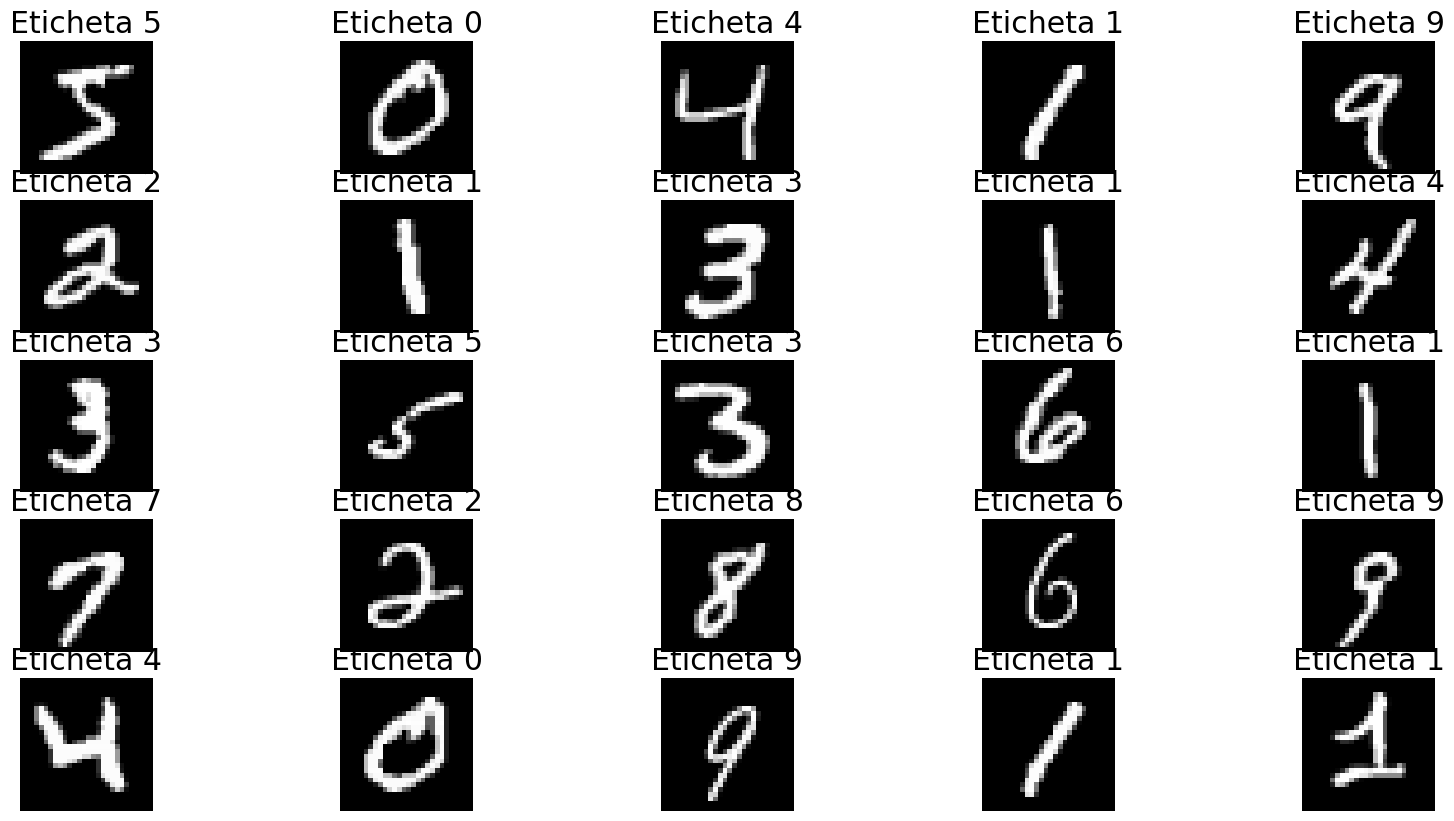

In [ ]:
def show_samples(x_set: np.ndarray, y_set: np.ndarray) -> None:
    size : int = x_set.shape[0]
    
    fig, ax = plt.subplots(size // 5, 5, figsize=(20, 10))
    for k in range(size):
        row, col = k // 5, k % 5
        
        # Make those columns into a array of 8-bits pixels
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(x_set[k], dtype='uint8')    
        
        # Reshape the array into 28 x 28 array (2-dimensional array)
        n = int(np.sqrt(len(pixels)))
        assert n**2 == len(pixels)
        pixels = pixels.reshape(n, n)
        ax[row, col].imshow(pixels, cmap='gray')
        ax[row, col].set_title('Eticheta {label}'.format(label=y_set[k]))
        ax[row, col].axis('off')

    plt.show()
    
show_samples(train_x[:25, :], train_y[:25])

Pentru regresia binomială, ne interesează să clasificăm deocamdată doar imaginile corespunzătoare a două clase, de exemplu pentru cifrele '8' (clasa pozitiva) şi '4' (clasa negativa). Vom defini seturile care 'decupează' doar aceste două clase din seturile date:

In [ ]:
# Filtrati din seturile mari doar acele sample-uri corespunzatoare cifrelor 8 si 4
# determinati vectorii logici cu True pentru indicii pt care clasele din vectorii y sunt 8 sau 4 si False in rest 
# (cifre != 8, 4)
labels_0_1_train = np.logical_or(train_y == 8, train_y == 4)
labels_0_1_test = np.logical_or(test_y == 8, test_y == 4)

assert labels_0_1_train.shape == (60000,)
assert labels_0_1_test.shape == (10000,)

assert labels_0_1_train.sum() == 11693
assert labels_0_1_test.sum() == 1956

# # Filtrati din seturile mari doar acele sample-uri corespunzatoare cifrelor 8 si 4. 
# Puteti folosi reshape pentru vectorii y  
# Folositi vectorii logici labels_0_1_train si labels_0_1_test pentru filtrare (indexare logica!)
train_x_bin, train_y_bin = train_x[labels_0_1_train], train_y[labels_0_1_train].reshape((11693,1))
test_x_bin, test_y_bin = test_x[labels_0_1_test], test_y[labels_0_1_test].reshape((1956, 1))

assert train_x_bin.shape == (11693, 784)
assert train_y_bin.shape == (11693, 1)
assert test_x_bin.shape == (1956, 784)
assert test_y_bin.shape == (1956, 1)

In [ ]:
# Momentan, vectorii 'y' sunt plini cu 8 si 4. Clasa '8' va fi clasa pozitiva (1), clasa '4' clasa negativa (0). 
# Trebuie deci sa suprascriem in cei 2 vectori 'y' valorile 8 cu 1 si 4 cu 0

# toate etichetele, de antrenare, de 8 vor fi trecute in 1; toate etichetele 4 vor fi trecute in 0
...

# toate etichetele, de testare, de 8 vor fi trecute in 1; toate etichetele 4 vor fi trecute in 0
...

# verificam ca etichetele din 'y' sunt acum 0 sau 1:
assert set(train_y_bin.flatten()) == {0, 1}
assert set(test_y_bin.flatten()) == {0, 1}

assert train_y_bin.sum() == 5851, 'Ar trebuie sa fie 5851 exemple de clase pozitive in setul de antrenare'
assert test_y_bin.sum() == 974, 'Ar trebuie sa fie 974 exemple de clase pozitive in setul de testare'

Modelul nostru va prezice clasa de care aparține un anumit input, $x$. Valoarea prezisă de model este notată cu $\hat{y}$ și este <b>probabilitatea ca inputul $x$ să aparțină clasei pozitive.</b>

$$P(y=1|x;\theta)=\hat{y}=\frac{1}{1+exp(-\theta^t\cdot x)}$$

Vom considera că $x_0^{(i)}=1$ pentru orice $i$, pentru a permite un termen liber în discriminatorul implementat de regresia logistică.

In [ ]:
# Prin urmare, adaugam o coloana cu 1 pentru orice x
def add_ones_column(x: np.ndarray) -> np.ndarray:
    """
    Returns a matrix with first column filled with 1 and the other columns being x's columns.
    """
    return np.hstack((np.ones(x.shape[0], 1), x))

train_x_bin_ext : np.ndarray = add_ones_column(train_x_bin)
test_x_bin_ext : np.ndarray = add_ones_column(test_x_bin)

assert train_x_bin_ext.shape == (11693, 785)
assert test_x_bin_ext.shape == (1956, 785)
assert np.all(train_x_bin_ext[:, 0] == 1)
assert np.all(test_x_bin_ext[:, 0] == 1)

Trasaturile trebuie normalizate, valoarea maximă actuală fiind 255. Normalizarea urmăreşte ca toate featurile rezultate să fie în intervalul \[0, 1\], deci vom împărţi la valoarea maximă.

In [ ]:
def normalize(x: np.ndarray) -> np.ndarray:
    """
    Normalization means division by 255.
    
    Args:
        x: feature matrix, shape m * n. It will not be changed by this code.
    
    Returns:
        matrix with scaled values between 0 and 1, of same shape
    """
    return x / 255
train_x_bin_ext : np.ndarray = add_ones_column(normalize(train_x_bin))
test_x_bin_ext : np.ndarray = add_ones_column(normalize(test_x_bin))

assert train_x_bin_ext.shape == (11693, 785)
assert test_x_bin_ext.shape == (1956, 785)
assert np.all(train_x_bin_ext[:, 0] == 1)
assert np.all(test_x_bin_ext[:, 0] == 1)
assert np.all(train_x_bin_ext <= 1)
assert np.all(test_x_bin_ext <= 1)
assert np.all(train_x_bin_ext >= 0)
assert np.all(test_x_bin_ext >= 0)

Probabilitatea $P(y=1|x;\theta)=\hat{y}=\frac{1}{1+exp(-\theta^t\cdot x)}=h(x,\theta)$ se bazează pe funcția sigmoidă, $sigmoid(z)=\frac{1}{1+e^{-z}}$.

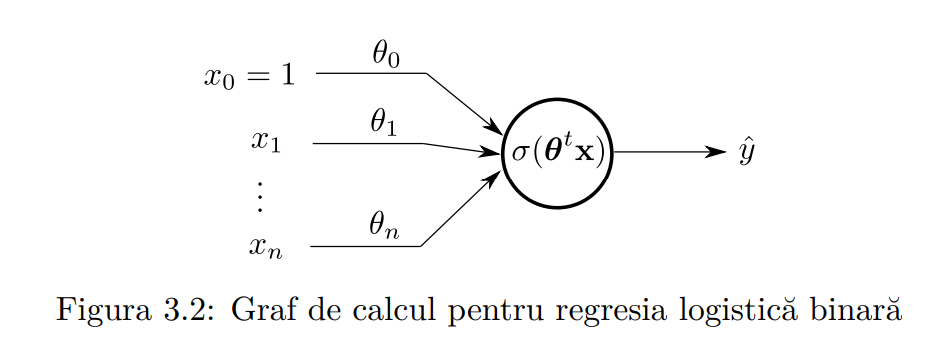

E util să menționăm vectorizarea calculului: notăm cu $X$ matricea care are drept linii vectorii $x^{(i)t}$:

\begin{pmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)}\\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)}\\
\vdots & \vdots & \vdots & \vdots \\
x_0^{(m)} & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
\end{pmatrix}

Atunci cele $m$ probabilități $\hat{y}^{(i)}=P(y^{(i)}=1|x^{(i)};\theta)$ sunt componente ale vectorului coloană $$\hat{y}=sigmoid(X \cdot \theta)$$ cu funcția $sigmoid$ aplicată pe fiecare componentă a vectorului coloană $X \cdot \theta$



In [ ]:
def sigmoid(z: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    """
    Given a number or an one-dimensional array, returns the value of the sigmoid function
    """
    return ...

assert sigmoid(0) == 0.5
assert np.abs(sigmoid(1) - 0.731058) < 1e-6

def h(x: Union[float, np.ndarray], theta: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    """
    :param x: input array
    :param theta: current weights
    :returns: The estimated prediction (real) of the logistic binomial regresion
    """
    return ...
assert np.abs(h(np.array([1., 0., 1., 1]), np.array([2., 1., 0., 0.5])) - 0.924141) < 1e-6

## Algoritmul de instruire
Setul de antrenare $\mathcal{S}$ este utilizat pentru a deduce valori adecvate ale lui $\theta$ astfel încât predicțiile $h_\theta(x^{(i)})$ date de model pentru valorile de intrare $x^{(i)}$ să fie cât mai apropiate de valorile actuale ale etichetelor corespunzătoare $y^{(i)}$.

Funcția care ne permite să decidem cât de bun este un vector de ponderi $\theta$ și care e totodată utilizată pentru ajustarea ponderilor în procesul de instruire este  <b>funcția de cost</b> și este notată tradițional cu $J(\cdot), J : \mathbf{R^{n+1}} \rightarrow \mathbf{R_+}$. Argumentul ei este vectorul de ponderi $\theta = (\theta_0, \theta_1, \dots, \theta_n)^t \in \mathbf{R^{n+1}}$. Valoarea se va calcula peste setul de instruire $\mathcal{S}$ , sau peste orice mulțime cu perechi formate din vectori de intrare si clasă de ieșire asociată.

## Functia de cost
Calculăm funcţia de cost cu regularizare  (atenţie, coeficientul $\theta_0$ nu se regularizează):

\begin{align}
J(\boldsymbol\theta) & = \underbrace{-\frac{1}{m} \sum\limits_{i=1}^m \left[y^{(i)}\cdot \ln h_{\boldsymbol\theta}(\mathbf{x}^{(i)}) + (1-y^{(i)})\cdot \ln (1- h_{\boldsymbol\theta}(\mathbf{x}^{(i)})) \right]}_{\text{Eroarea de calitate}} 
\\
& + \underbrace{\frac{\lambda}{2} \sum\limits_{j=1}^n \theta_j^2}_{\text{termenul de regularizare}}
\\
& = 
\underbrace{-\frac{1}{m} \sum\limits_{i=1}^m \left[y^{(i)}\cdot \ln \hat y^{(i)}  + (1-y^{(i)})\cdot \ln (1- \hat y^{(i)}) \right]}_{\text{Eroarea de calitate}} 
\\
& + \underbrace{\frac{\lambda}{2} \sum\limits_{j=1}^n \theta_j^2}_{\text{termenul de regularizare}}
\\
& = -\frac{1}{m} \left(\mathbf{y}^t \cdot \ln\hat{\mathbf{y}}  + (\mathbb{1}-\mathbf{y})^t \cdot \ln(\mathbb{1}-\hat{\mathbf{y}})\right) + \frac{\lambda}{2} \| \boldsymbol\theta[1:]  \|^2_2
\end{align}

unde $\boldsymbol\theta[1:]$ este vectorul format din toate componentele lui $\boldsymbol\theta$ mai puțin prima, iar $\| \mathbf{v} \|_2$ este norma Euclidiană a vectorului $\mathbf{v}$.

In [ ]:
def cost(x: np.ndarray, y: np.ndarray, theta: np.ndarray, lmbda: float) -> float:
    """
    Cost function including regularization
    
    Args:
        x: matricea de design a feature-urilor, dimensiune m x (n+1)
        y: vectorul ground truth, dimensiune m x 1
        theta: vectorul ponderilor modelului, dimensiune (n+1) x 1
        
    Returns:
        costul, ca scalar
    """
    assert x.shape[1] == theta.shape[0]
    assert x.shape[0] == y.shape[0]
    assert theta.shape[1] == y.shape[1] == 1
    assert lmbda >= 0
    # calculam y hat folosind modelul din functia h:
    y_hat : np.ndarray = ...
    # calculam eroarea de calitate
    j1 = ...
    # calculam termenul de regularizare
    j2 = ...
    return ...
    

np.random.seed(11)
n = train_x_bin_ext.shape[1]
theta = np.random.randn(n).reshape(n, 1)
assert np.abs(cost(train_x_bin_ext, train_y_bin, theta=theta, lmbda=0.2) - 80.963789) < 1e-6

## Gradient descent
Pentru calcularea valorilor optime pentru $\theta$ se folosește algoritmul de căutare după direcția gradientului (gradient descent): se pornește cu valori aleator setate componentelor vectorului $\theta$ și se modifică în mod iterativ, scăzând la fiecare pas valoarea gradientului înmulțită cu un coeficient pozitiv mic $\alpha$, numit rată de învățare.

Pentru detalii legate de gradient descent, vezi 2.3 în suportul de curs.

Calculăm gradientul, folosind expresia determinată anterior, şi ţinând seama de termenul de regularizare:

$$
\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{m} \mathbf{X}^t(\hat{\mathbf{y}} - \mathbf{y}) + \lambda (0, \theta_1, \dots, \theta_n)^t
$$

In [ ]:
def grad(x: np.ndarray, y: np.ndarray, theta: np.ndarray, lmbda: float) -> np.ndarray:
    """
    Calculul gradientului pentru functia de eroare, incluzand termenul de regularizare
    
    Args:
        x: matricea feature-urilor, dimensiune m x (n + 1)
        y: vectorul evidentei, dimensiune m
        theta: vectorul coeficientilor, dimensiune n+1
        lmbda: coeficientul de regularizare
        
    Returns:
        gradientul, vector de n+1 elemente
    """
    m: int = x.shape[0]
    g1 : np.ndarray = ... # gradientul termenului de calitate, fara regularizare
    
    ...
    g2 : np.ndarray = ... # gradientul aferent termenului de regularizare
    
    g : np.ndarray = g1 + g2
    assert g.shape == theta.shape
    return g

np.random.seed(11)
n = train_x_bin_ext.shape[1]
theta = np.random.randn(n).reshape(n, 1)
res = grad(train_x_bin_ext, train_y_bin, theta=theta, lmbda=0.2)
assert res.shape == (785, 1)

## Acuratetea

In [ ]:
def accuracy(x_set : np.ndarray, y_set : np.ndarray, theta : np.ndarray) -> float:
    return ...

## Antrenarea

In [ ]:
# Set learning rate
alpha : float = 0.2

# Set regularization coefficient
lmbda : float = 0.5

# In x, we have m instances of n features each
# Create theta as a vector (n x 1)
n : int = np.shape(train_x_bin_ext)[1]
theta = ...

# Do the training
epochs : int = 40
values : List[float] = []
accurracies : List[float] = []
for i in range(epochs):
    theta -= alpha * grad(train_x_bin_ext, train_y_bin, theta, lmbda)
    acc = accuracy(train_x_bin_ext, train_y_bin, theta)
    values.append(cost(train_x_bin_ext, train_y_bin, theta, lmbda))
    accurracies.append(acc)
    
print("last cost: %g" % values[-1])

last cost: 0.403936


C:\Users\mirel\AppData\Local\Temp\ipykernel_26124\325383333.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("last cost: %g" % values[-1])


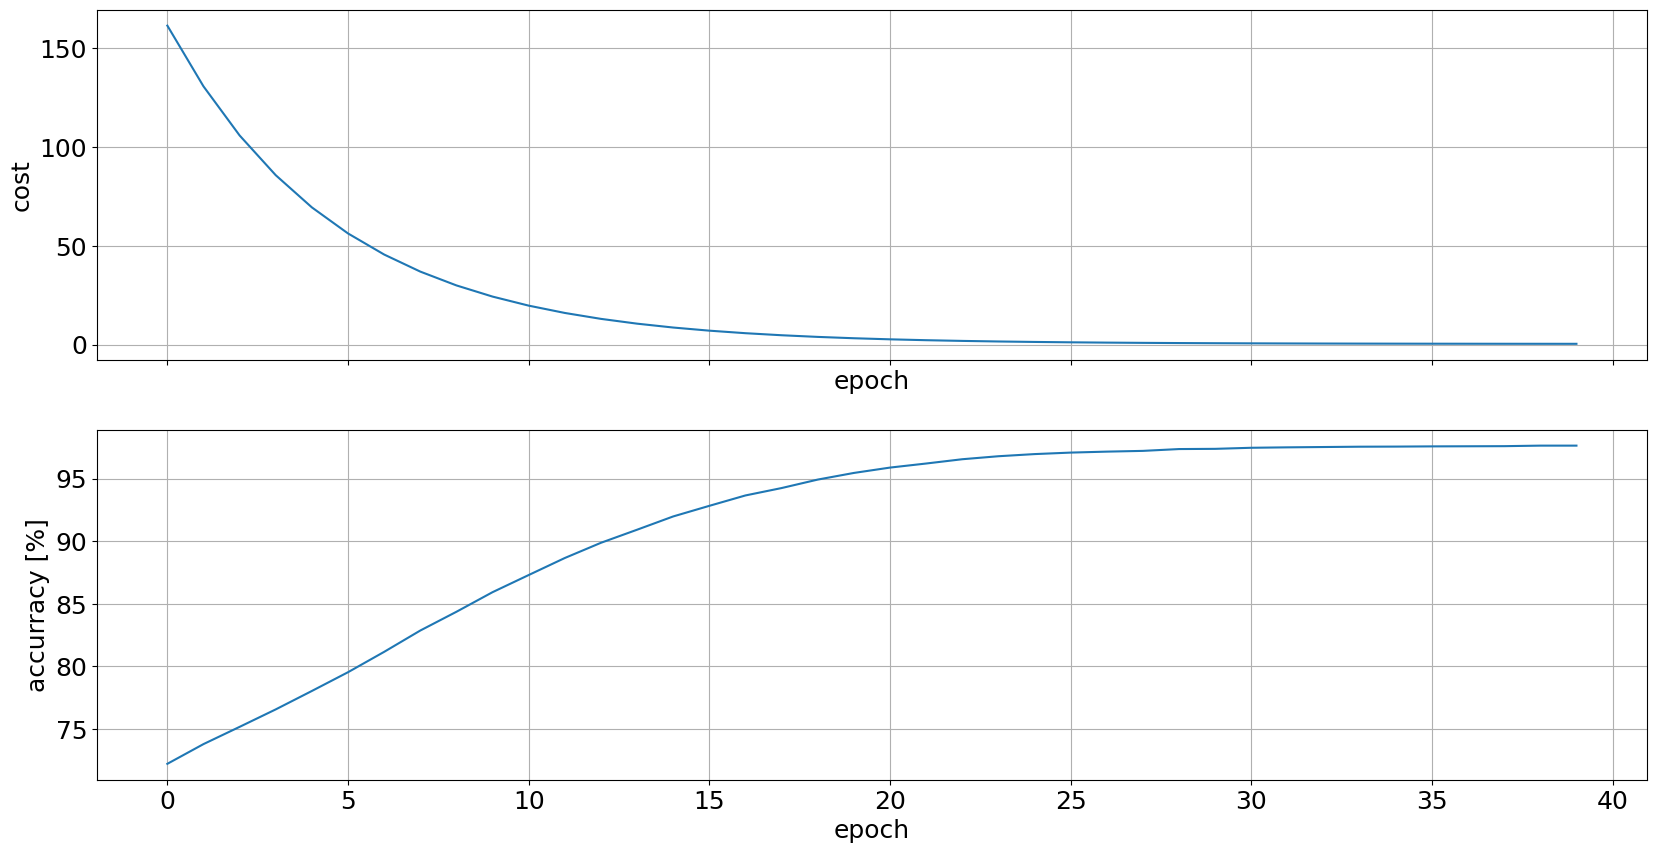

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
ax[0].plot(range(len(values)), values)
ax[0].set_xlabel('epoch') ; ax[0].set_ylabel('cost')
ax[0].grid()
ax[1].plot(range(len(accurracies)), accurracies)
ax[1].set_xlabel('epoch') ; ax[1].set_ylabel('accurracy [%]')
ax[1].grid()
plt.show()

In [ ]:
!pip install tableprint

In [ ]:
import tableprint as tab

In [ ]:
# Calculam acuratetea pentru setul de test
# Aceasta presupune sa numaram cate predictii se potrivesc cu realitatea si sa exprimam acest lucru procentual
pred : np.ndarray = ((h(test_x_bin_ext, theta) >= 0.5) * 1 == test_y_bin)
print("accuracy: %2.2f%% for %d patterns" % ( pred[pred == True].size / pred.size * 100, test_x_bin_ext.shape[0]))

# Calculam confusion matrix
# true positive: y = 1 and pred = 1
# true negative: y = 0 and pred = 0
# false positive: y = 0 and pred = 1
# false negative: y = 1 and pred = 0
pred : np.ndarray = (h(test_x_bin_ext, theta) >= 0.5) * 1
tp : int = np.sum(...)
tn : int = np.sum(...)
fp : int = np.sum(...)
fn : int = np.sum(...)

headers = ['Confusion Matrix', 'pred: 0', 'pred: 1', 'pred: all'] 
table = [
    ['actual: 0', tn, fp, tn + fp],
    ['actual: 1', fn, tp, fn + tp],
    ['actual: all', tn + fn, fp + tp, tn + fn + fp + tp]]
tab.table(table, headers, width=16)

accuracy: 97.90% for 1956 patterns
╭──────────────────┬──────────────────┬──────────────────┬──────────────────╮
│ Confusion Matrix │          pred: 0 │          pred: 1 │        pred: all │
├──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│        actual: 0 │              965 │               17 │              982 │
│        actual: 1 │               24 │              950 │              974 │
│      actual: all │              989 │              967 │             1956 │
╰──────────────────┴──────────────────┴──────────────────┴──────────────────╯
